<a href="https://colab.research.google.com/github/trighpro123/BT_tuan13/blob/main/Mnist(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

#Load và phan chia dư liệu
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(np.shape(x_train))
print(np.shape(x_test))

# Xử lý dữ liệu thành 0-1
# x_train=x_train.reshape(60000,784) 
# #  hàng nối tiếp hàng sao cho đủ 784 chứ ko phải 28 nữa. 784 tín hiệu vào
# x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32') # Ép kiểu
x_test=x_test.astype('float32')
x_train/=255 # Các pixel number có giá trị từ [0,255] về giới hạn 0-1
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)



11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils

# #Tạo mo hình

model=Sequential()
# BLock 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1))) # 32 phụ thuộc vào bội số byte
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) # padding same để kích thước trước giông skichs thước sau
model.add(MaxPooling2D((2,2)))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

# # Biên dịch
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics='accuracy')
history=model.fit(x_train,y_train,batch_size=128,epochs=30,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
y_pre=model.predict(x_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

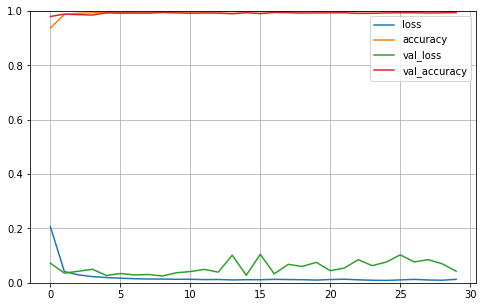

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


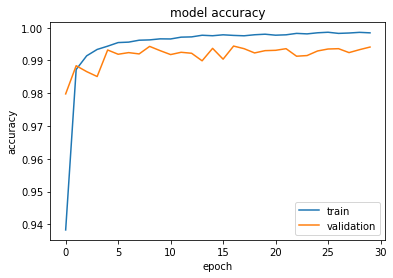

In [ ]:


# # Vẽ đồ thị bằng plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

In [ ]:
model.save_weights("mnist_CNN_weights.h5")